In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
mean1 = np.array([1,0.5])
cov1 = np.array([[1,0.1],[0.1,1.2]])
mean2 = np.array([4,5])
cov2 = np.array([[1.2,0.1],[0.1,1.3]])
dist1 = np.random.multivariate_normal(mean1,cov1,500)
dist2 = np.random.multivariate_normal(mean2,cov2,500)

In [124]:
dist1.shape,dist2.shape

((500, 2), (500, 2))

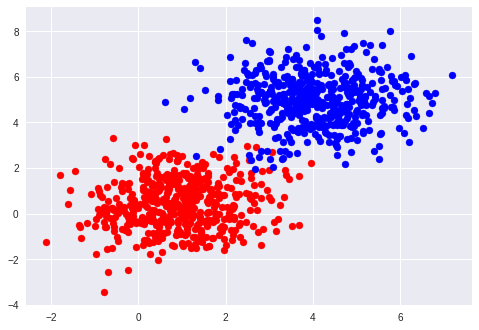

In [125]:
plt.style.use('seaborn')
plt.scatter(dist1[:,0],dist1[:,1],c='red')
plt.scatter(dist2[:,0],dist2[:,1],c='blue')
plt.show()

In [126]:
data = np.zeros((1000,3))

In [127]:
data[:500,:2] = dist1
data[500:,:2] = dist2
data[500:,-1] = 1

In [128]:
np.random.shuffle(data)

In [129]:
split = int(0.8*data.shape[0])
x_train = data[:split,:-1]
x_test = data[split:,:-1]
y_train = data[:split,-1]
y_test = data[split:,-1]

In [130]:
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)

In [131]:
x_train = (x_train - x_mean)/x_std

In [132]:
x_test = (x_test - x_mean)/x_std

In [133]:
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

def hypothesis(x,theta):
  return sigmoid(np.dot(x,theta))

def error(x,y,theta):
  hi = hypothesis(x,theta)
  error = -1*np.mean((y*np.log(hi)) + ((1-y)*np.log(1-hi)))
  return error

def gradient(x,y,theta):
  hi = hypothesis(x,theta)
  grad = np.dot(x.T,y-hi)
  return grad/x.shape[0]

def gradient_descent(x,y,lr=0.1,max_iters=500):
  n = x.shape[1]
  theta = np.zeros((n,)) 
  error_list = []
  for i in range(max_iters):
    e = error(x,y,theta)
    error_list.append(e)
    grad = gradient(x,y,theta)
    theta = theta + lr*grad
  return theta,error_list

In [134]:
ones = np.ones((x_train.shape[0],1))
x_train = np.hstack((ones,x_train))
x_train.shape

(800, 3)

In [135]:
theta,error_list = gradient_descent(x_train,y_train)

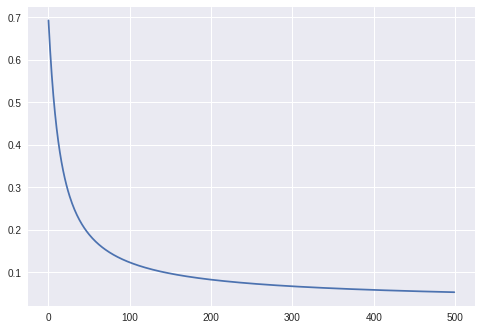

In [136]:
plt.plot(error_list)

In [137]:
y_train = y_train.reshape((-1,1))

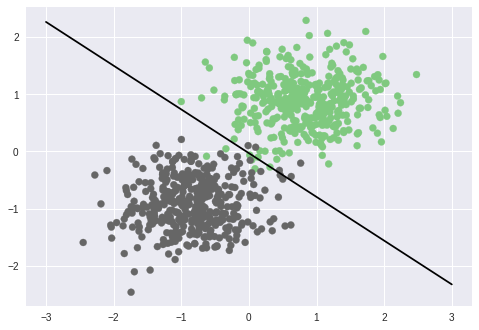

In [138]:
plt.scatter(x_train[:,1],x_train[:,2],c=y_train.reshape((-1,)),cmap=plt.cm.Accent_r)
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2,c='black')
plt.show()

In [139]:
def predict(x,theta):
  h = hypothesis(x,theta)
  output = np.zeros((h.shape))
  output[h>=0.5] = 1
  return output.astype(int)

In [140]:
x_new_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))
x_new_test.shape

(200, 3)

In [141]:
xtest_pred = predict(x_new_test,theta)

In [142]:
xtest_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1])

In [145]:
x_train_pred = predict(x_train,theta)

In [152]:
x_train_pred = x_train_pred.reshape((-1,1))

In [164]:
def accuracy(actual,preds):
  actual = actual.astype(int)
  acc = (np.sum(actual==preds))/actual.shape[0]
  return acc

acc = accuracy(y_train,x_train_pred)
print("accuracy on training data = {}%".format(acc*100))

accuracy on training data = 98.625%


In [163]:
acc = accuracy(y_test,xtest_pred)
print("accuracy on testing data = {}%".format(acc*100))

accuracy on testing data = 99.5%
